In [1]:


import numpy as np # linear algebra
import pandas as pd# data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import os


In [2]:
df = pd.read_csv('/kaggle/input/car-prices-prediction-data/CarPricesPrediction.csv')


# Explore Data

In [3]:
df.head()

,Unnamed: 0,Make,Model,Year,Mileage,Condition,Price
0,0,Ford,Silverado,2022,18107,Excellent,19094.75
1,1,Toyota,Silverado,2014,13578,Excellent,27321.10
2,2,Chevrolet,Civic,2016,46054,Good,23697.30
3,3,Ford,Civic,2022,34981,Excellent,18251.05
4,4,Chevrolet,Civic,2019,63565,Excellent,19821.85


In [4]:
df.tail()

,Unnamed: 0,Make,Model,Year,Mileage,Condition,Price
995,995,Nissan,Camry,2010,149032,Excellent,24548.50
996,996,Chevrolet,F-150,2014,20608,Excellent,26969.70
997,997,Ford,Altima,2016,109851,Good,20507.55
998,998,Toyota,Silverado,2010,11704,Good,31414.90
999,999,Nissan,Silverado,2017,128390,Excellent,18580.60


In [5]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,1000.0,2015.86500,3.782470,2010.0,2013.0000,2016.000,2019.000,2022.0
Mileage,1000.0,78796.92700,39842.259941,10079.0,44942.7500,78056.500,112366.250,149794.0
Price,1000.0,22195.20565,4245.191585,12613.0,18961.8625,22247.875,25510.275,31414.9


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Make       1000 non-null   object 
 1   Model      1000 non-null   object 
 2   Year       1000 non-null   int64  
 3   Mileage    1000 non-null   int64  
 4   Condition  1000 non-null   object 
 5   Price      1000 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 47.0+ KB


In [8]:
df.isnull().sum()

Make         0
Model        0
Year         0
Mileage      0
Condition    0
Price        0
dtype: int64

In [9]:
df.duplicated().sum()

0

# Analysis of data

<Axes: xlabel='Make', ylabel='count'>

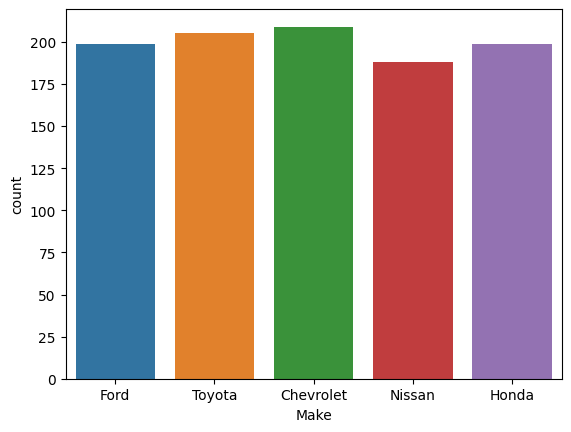

In [10]:
sns.countplot(data=df , x = df['Make'])

<Axes: xlabel='Condition', ylabel='count'>

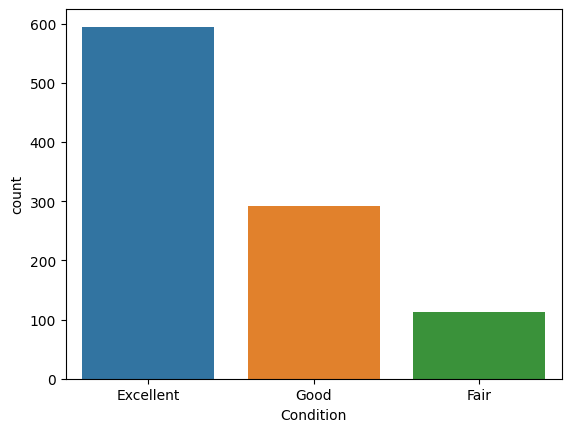

In [11]:
sns.countplot(data=df , x = df.Condition)

<Axes: xlabel='Model', ylabel='count'>

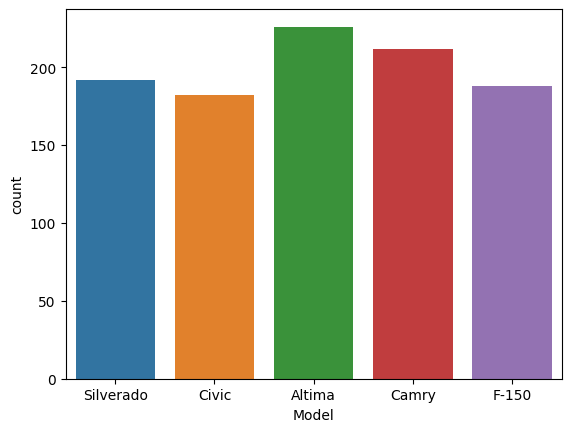

In [12]:
sns.countplot(data=df , x = df.Model)

<Axes: xlabel='Year', ylabel='Price'>

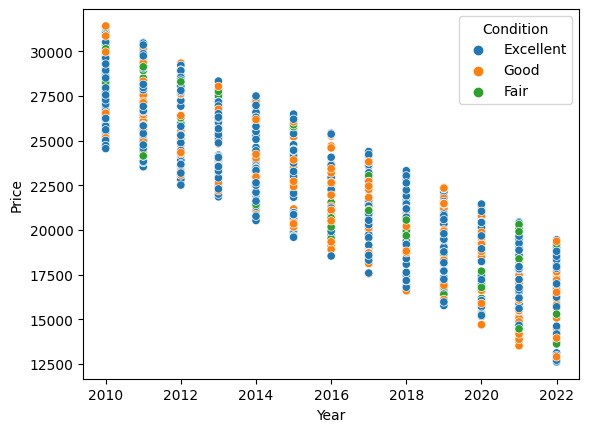

In [13]:
sns.scatterplot(data = df,x = df.Year ,y = df.Price,hue = df.Condition)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


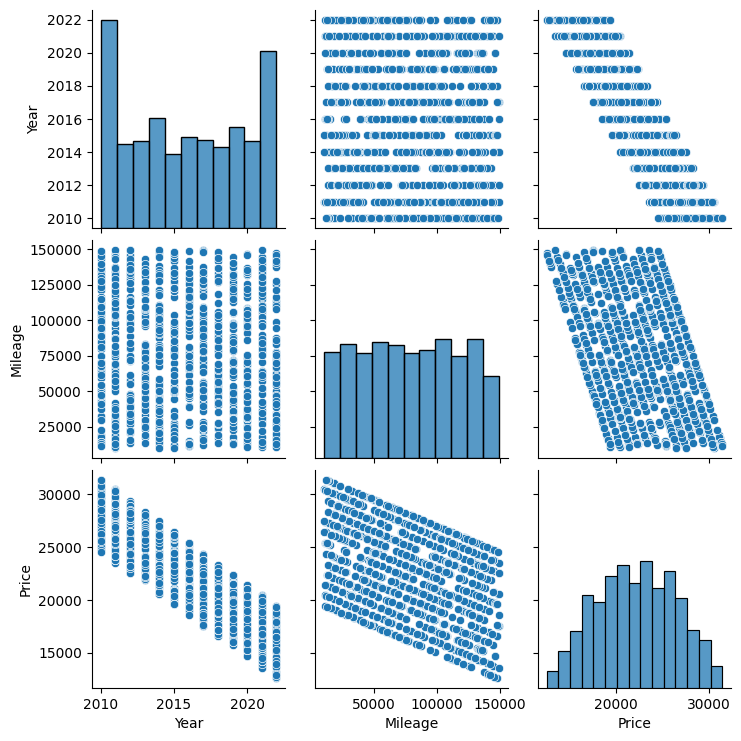

In [14]:
sns.pairplot(df)

<Axes: >

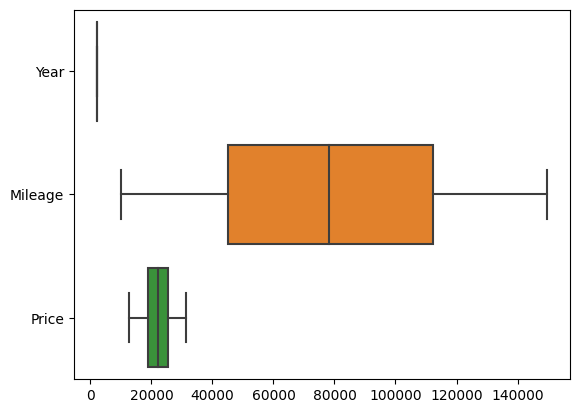

In [15]:
sns.boxplot(data = df,orient='h')

In [16]:
df.nunique()

Make           5
Model          5
Year          13
Mileage      993
Condition      3
Price        997
dtype: int64

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
object_col = df.select_dtypes(include=['object']).columns
for i in object_col:
    df[i] = le.fit_transform(df[i])


In [18]:
df.head()

,Make,Model,Year,Mileage,Condition,Price
0,1,4,2022,18107,0,19094.75
1,4,4,2014,13578,0,27321.10
2,0,2,2016,46054,2,23697.30
3,1,2,2022,34981,0,18251.05
4,0,2,2019,63565,0,19821.85


In [19]:
df.corr()

,Make,Model,Year,Mileage,Condition,Price
Make,1.000000,-0.019360,-0.026755,0.046197,-0.030410,0.002161
Model,-0.019360,1.000000,-0.017938,-0.008604,0.018052,0.020021
Year,-0.026755,-0.017938,1.000000,-0.016850,-0.012430,-0.883093
Mileage,0.046197,-0.008604,-0.016850,1.000000,0.004215,-0.454250
Condition,-0.030410,0.018052,-0.012430,0.004215,1.000000,0.009096
Price,0.002161,0.020021,-0.883093,-0.454250,0.009096,1.000000


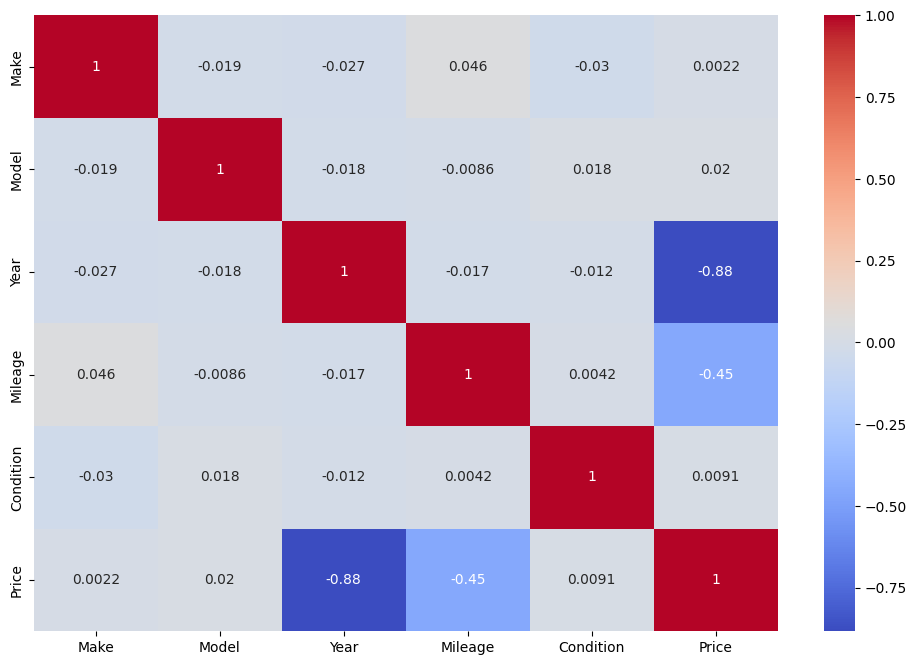

In [20]:
plt.figure(figsize = (12,8))
sns.heatmap(df.corr() , annot = True,cmap = 'coolwarm')
plt.show()

# ML----> Model

In [21]:
x = df.drop(['Price'],axis = 1)
y = df.loc[: ,'Price']

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state = 0,shuffle = True)

In [23]:
print(x_train.shape)
print(x_test.shape)

(800, 5)
(200, 5)


In [24]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

In [25]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print(mean_squared_error(y_pred,y_test))
print(mean_absolute_error(y_pred,y_test))


0.00457799028634028
0.05963959021115443


In [26]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
x_poly = poly.fit_transform(x)
x_train_poly,x_test_poly,y_train,y_test = train_test_split(x,y,test_size=.20,random_state = 0,shuffle = True)

In [27]:
lr.fit(x_train_poly,y_train)
y_pred_poly = lr.predict(x_test_poly)
print(mean_squared_error(y_pred_poly,y_test))
print(mean_absolute_error(y_pred_poly,y_test))

0.00457799028634028
0.05963959021115443


In [28]:
lr.coef_


array([ 1.28792242e-03,  6.26775909e-04, -9.99998961e+02, -5.00000617e-02,
       -4.82549422e-03])

In [29]:
lr.intercept_

2041997.9623663782

Text(0, 0.5, 'Predict Price')

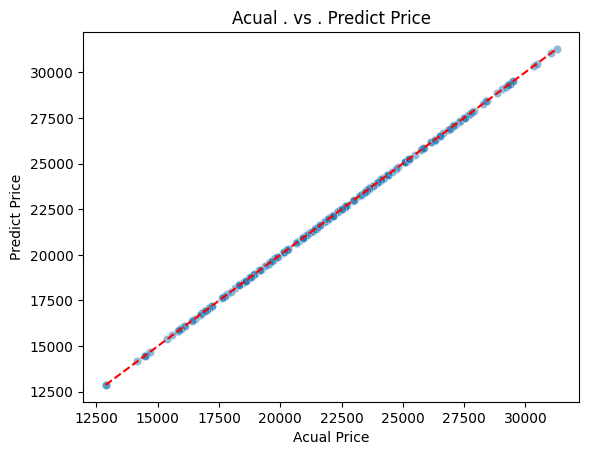

In [30]:
sns.scatterplot(x = y_test,y=y_pred,alpha=.5)
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color = 'r',linestyle = '--')
plt.title('Acual . vs . Predict Price')
plt.xlabel('Acual Price')
plt.ylabel('Predict Price')

lasso and tree make error large 


In [31]:
# from sklearn.linear_model import Lasso,Ridge
# lasso = Lasso()
# lasso.fit(x_train,y_train)
# y_pred_lasso = lasso.predict(x_test)
# print(mean_squared_error(y_pred_lasso,y_test))
# print(mean_absolute_error(y_pred_lasso,y_test))

In [32]:
# from sklearn.tree import DecisionTreeRegressor
# reg = DecisionTreeRegressor()
# reg.fit(x_train,y_train)
# y_reg = reg.predict(x_test)
# print(mean_squared_error(y_reg,y_test))
# print(mean_absolute_error(y_reg,y_test))